# Домашнее задание «Случайные марковские процессы»

**Преподаватель:** Даниил Корбут, Наталья Баданина, Елена Харьковская

**Задание**


1. Скачайте текст произведения «Война и мир»: ссылка на [GitHub](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace).
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.
4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [236]:
import requests
import re
import numpy as np
from collections import defaultdict

In [237]:
# Ссылки на тома произведения
urls = [
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_1.txt",
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_2.txt",
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_3.txt",
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_4.txt"
]

# Скачивание и объединение текстов

In [238]:
import requests

# Ссылки на тома произведения
urls = [
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_1.txt",
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_2.txt",
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_3.txt",
    "https://raw.githubusercontent.com/stefkong1982/netology.ru/refs/heads/Master/Vremennye_ryady/Sluchajnye_markovskie_processy/tom_4.txt"
]

# Загрузка каждого тома в отдельные переменные
tom_1 = requests.get(urls[0]).text
tom_2 = requests.get(urls[1]).text
tom_3 = requests.get(urls[2]).text
tom_4 = requests.get(urls[3]).text

In [239]:
# Объединение текстов
full_text = tom_1 + tom_2 + tom_3 + tom_4

In [240]:
# Вывод текста после объединения
print("Общий текст после объединения (посдедние 1000 символов):")
print()
print(full_text[-1000:])
print(f"Длина объединенного текста: {len(full_text)} символов.")

Общий текст после объединения (посдедние 1000 символов):

азаться от непосредственного чувства неподвижности земли и такого же чувства движения планет, так и для истории трудность признания подчиненности личности законам пространства, времени и причин состоит в том, чтобы отказаться от непосредственного чувства независимости своей личности. Но, как в астрономии новое воззрение говорило: «Правда, мы не чувствуем движения земли, но, допустив ее неподвижность, мы приходим к бессмыслице; допустив же движение, которого мы не чувствуем, мы приходим к законам», – так и в истории новое воззрение говорит: «И правда, мы не чувствуем нашей зависимости, но, допустив нашу свободу, мы приходим к бессмыслице; допустив же свою зависимость от внешнего мира, времени и причин, приходим к законам».

В первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение; в настоящем случае – точно так же необходимо отказаться от несуществующей своб

In [241]:
# Вывод текста tom_4
print("(посдедние 1000 символов):")
print()
print(tom_4[-1000:])
print(f"Длина текста: {len(tom_4)} символов.")

(посдедние 1000 символов):

азаться от непосредственного чувства неподвижности земли и такого же чувства движения планет, так и для истории трудность признания подчиненности личности законам пространства, времени и причин состоит в том, чтобы отказаться от непосредственного чувства независимости своей личности. Но, как в астрономии новое воззрение говорило: «Правда, мы не чувствуем движения земли, но, допустив ее неподвижность, мы приходим к бессмыслице; допустив же движение, которого мы не чувствуем, мы приходим к законам», – так и в истории новое воззрение говорит: «И правда, мы не чувствуем нашей зависимости, но, допустив нашу свободу, мы приходим к бессмыслице; допустив же свою зависимость от внешнего мира, времени и причин, приходим к законам».

В первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение; в настоящем случае – точно так же необходимо отказаться от несуществующей свободы и признать неощущаемую нам

# Очистка текста

In [242]:
# Приведение текста к нижнему регистру
lowercase_text = full_text.lower()

# Оставляем только русские буквы и пробелы
cleaned_text = re.sub(r'[^а-яё\s]', '', lowercase_text)

In [243]:
# Проверим очищенный текст
print(cleaned_text[-1000:])
print(f"Длина очищенного текста: {len(cleaned_text)} символов.")

 земли состояла в том чтобы отказаться от непосредственного чувства неподвижности земли и такого же чувства движения планет так и для истории трудность признания подчиненности личности законам пространства времени и причин состоит в том чтобы отказаться от непосредственного чувства независимости своей личности но как в астрономии новое воззрение говорило правда мы не чувствуем движения земли но допустив ее неподвижность мы приходим к бессмыслице допустив же движение которого мы не чувствуем мы приходим к законам  так и в истории новое воззрение говорит и правда мы не чувствуем нашей зависимости но допустив нашу свободу мы приходим к бессмыслице допустив же свою зависимость от внешнего мира времени и причин приходим к законам

в первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение в настоящем случае  точно так же необходимо отказаться от несуществующей свободы и признать неощущаемую нами зависимость






Длина о

все ок

# Построение матрицы переходных вероятностей

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Русский алфавит
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

# Наш текст
text = cleaned_text

# Создание матрицы вероятностей
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

# Заполнение матрицы частот переходов
for cp, cn in zip(text[:-1], text[1:]):
    if cp in POS and cn in POS:  # Проверяем, что буквы в русском алфавите
        probabilities[POS[cp], POS[cn]] += 1

# Нормализация матрицы для получения вероятностей
probabilities = (probabilities / probabilities.sum(axis=1, keepdims=True))

# Создание DataFrame
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))


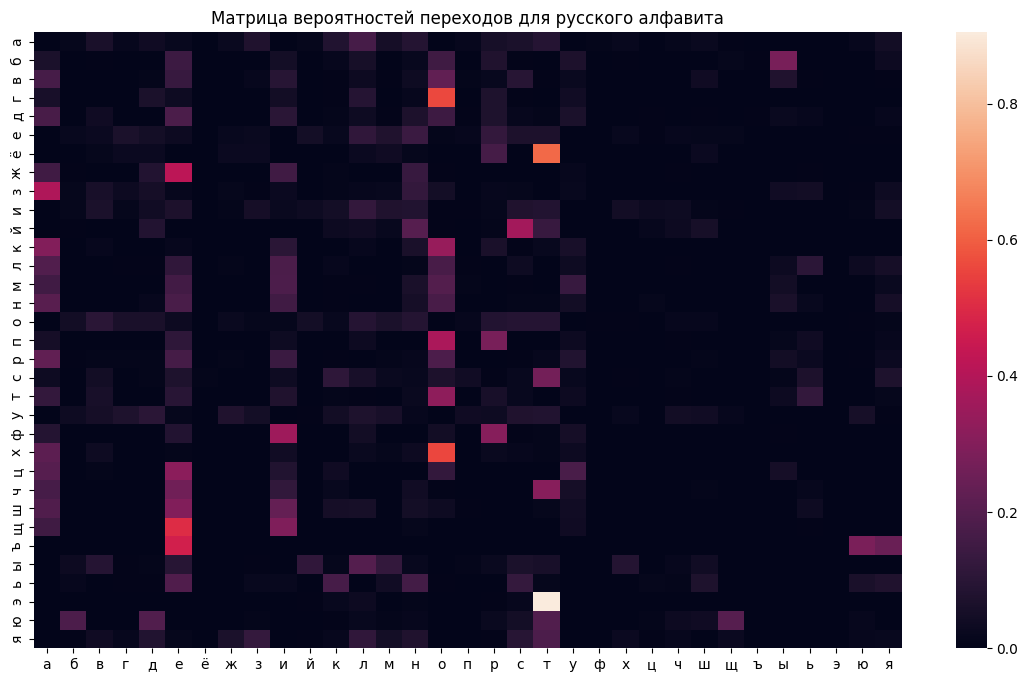

In [245]:
# визуализация
plt.figure(figsize=(14, 8))
sns.heatmap(df)
plt.title("Матрица вероятностей переходов для русского алфавита")
plt.show()

Проанализировав матрицу вероятностей, мы можем увидеть, что слова, начинающиеся с буквы 'э' и следующими за ней буквами 'т', встречаются в нашем тексте значительно чаще, чем остальные последовательности давайте найдем их и посмотрим на них

In [246]:
# Находим все слова, начинающиеся на "э"
words = re.findall(r'\bэ[^ ]*?\b', cleaned_text)

# Фильтруем слова, у которых четвертая буква - "т"
filtered_words = [word for word in words if len(word) > 1 and word[1] == 'т']

# Создаем DataFrame с уникальными словами и их количеством
word_counts = pd.Series(filtered_words).value_counts()

In [247]:
# Выводим DataFrame
word_counts.head()

,count
это,2566
этого,794
этот,609
эти,441
этом,345


**Высокая частота использования:**
- Слова, начинающиеся на "э", присутствуют в тексте "Войны и мира" с заметной частотой. Например, слово "это" встречается 2566 раз, что указывает на его важную роль в структуре предложений и связности текста.
- Другие слова, такие как "этого", "этот", "эти", также имеют значительное количество вхождений. Это может говорить о том, что автор часто использует указательные местоимения.

# Расчет вероятности встретить строку из четырёх символов, начинающуюся на «П» и заканчивающуюся на «Р»

In [248]:
# Начальная и конечная позиции
start = POS['п']
end = POS['р']

# Принимаем равную вероятность для всех символов
prior = 1. / len(RUSSIAN)

# Переменная для хранения общей вероятности
total_probability = 0
words_list = []  # Список для хранения найденных слов и их вероятностей

# Генерируем 4-буквенные слова и считаем их вероятности
for x in RUSSIAN:  # Первая промежуточная буква
    for z in RUSSIAN:  # Вторая промежуточная буква
        proba = prior * probabilities[start, POS[x]] * probabilities[POS[x], POS[z]] * probabilities[POS[z], end]
        if proba > 0:
            word = ''.join(['п', x, z, 'р'])  # Формируем слово
            words_list.append([word, proba]) # Добавляем слово и вероятность в список
            total_probability += proba  # Суммируем вероятность в общую

# Создаем DataFrame из собранных данных
df_words_list = pd.DataFrame(words_list, columns=['Word', 'Probability'])

# Выводим общую вероятность
print("Общая вероятность для всех 4-буквенных слов:", total_probability)

Общая вероятность для всех 4-буквенных слов: 0.0012078694558204483


In [249]:
# Сортируем DataFrame по столбцу "Probability" от большего к меньшему
df_sorted = df_words_list.sort_values(by='Probability', ascending=False)

# Округляем значения в столбце "Probability" до 3 знаков после запятой
df_sorted['Probability'] = df_sorted['Probability'].round(10)

# DataFrame, содержащий все сформированные 4-буквенные слова и их вероятности
df_sorted

,Word,Probability
259,прер,0.000169
267,прор,0.000126
254,прар,0.000105
224,потр,0.000062
221,попр,0.000054
...,...,...
176,пмэр,0.000000
160,пмйр,0.000000
305,псщр,0.000000
173,пмшр,0.000000


Анализ результатов

1. Общая вероятность:
   - Общая вероятность для всех 4-буквенных слов, начинающихся на "П" и заканчивающихся на "Р", составила 0.0012078694558204483. Это означает, что в рамках нашего исследования и использованной вероятностной модели, такие слова встречаются с вероятностью примерно 0.121%, что может быть интерпретировано как достаточно редкое событие.

2. Сформированные слова и их вероятности:
   - Мы сформировали список слов, который начинается с "п" и заканчивается на "р", с двумя промежуточными буквами. По результатам, наивысшая вероятность на `прер` составляет 0.000169, что также говорит о редкости данных слов.

# Генерация слова, начинающегося с буквы «Б» и длиной восемь символов

In [250]:
# Инициализация списка, который будет содержать буквы слова
s = []

# Задаем стартовую букву, с которой начинается слово
start = 'б'
s.append(start)  # Добавляем стартовую букву в список

# Определяем желаемую длину слова
length = 8

# Генерация слова
for i in range(length):  # Генерируем (length) букв
    index = POS[s[i]]  # Получаем индекс текущей буквы в алфавите
    # Выбираем следующую букву на основе вероятностей перехода
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)  # Добавляем выбранную букву в список

# Объединяем буквы в одно слово
generated_word = ''.join(s)

# Выводим сгенерированное слово
print("Сгенерированное слово:", generated_word)

Сгенерированное слово: беностере


# Создаем и обучаем модель HMM с оптимальным количеством компонент

In [251]:
# Устанавливаем библиотеку для работы с HMM
!pip install hmmlearn

In [252]:
from hmmlearn.hmm import GaussianHMM

In [253]:
# Скачиваем данные (число пассажиров международных авиаперевозок)
series = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/international-airline-passengers.csv")["Count"]

In [254]:
# Преобразуем данные в формат, подходящий для HMM
values = series.values.reshape(-1,1)

In [289]:
# Оценка модели с различным количеством компонент (состояний)
for n in range(1, 11):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print(n, model.score(values))  # Печатаем логарифмическую вероятность

1 -893.1837902090575
2 -893.1775322362838
3 -780.5000105380417
4 -768.2367886523443
5 -743.7346087106736
6 -736.2633760613534
7 -732.7030168405977
8 -749.3895818711122
9 -706.2844568107317
10 -697.5182400297414


Анализ логарифмической вероятности


- Между 5 и 7 компонентами наблюдается плавное улучшение, при этом каждый последующий добавленный компонент вносит меньший вклад в улучшение вероятности по сравнению с предыдущими компонентами. Это может свидетельствовать о плате за сложность модели — добавление компонентов становится менее эффективным на более высоких уровнях.

- На основе анализа логарифмических вероятностей было принято решение о выборе модели с 7 компонентами.

In [315]:
# Определяем оптимальное количество компонент
optimal_n = 7

# Создаем и обучаем модель HMM с оптимальным количеством компонент
model = GaussianHMM(n_components=optimal_n,
                    covariance_type="diag",
                    n_iter=1000)
model.fit(values)

# Прогнозируем скрытые состояния для наблюдений
labels = model.predict(values)

# Создаем массив средних значений для каждой компоненты
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]  # Заполнение средними значениями

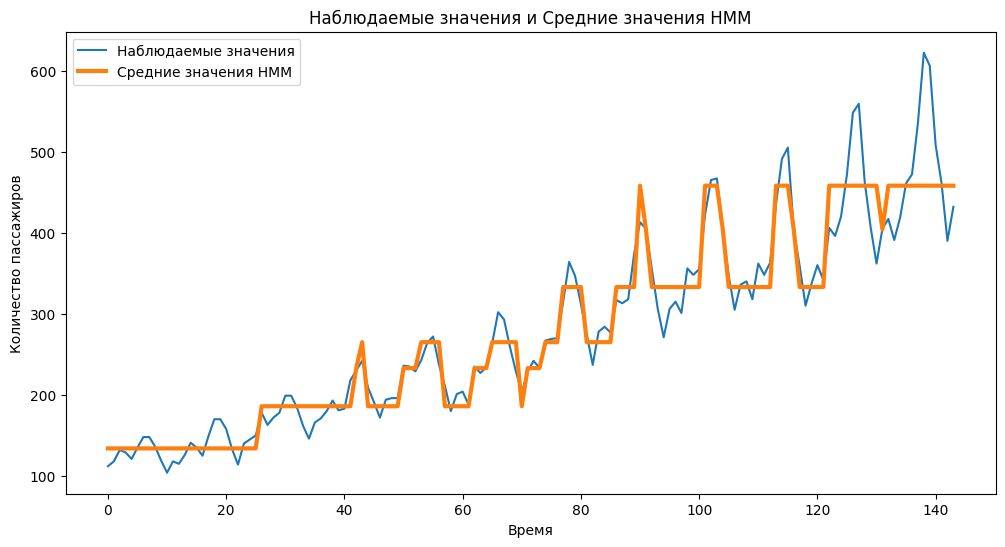

In [316]:
# Строим график: наблюдаемые значения и средние значения по состояниям
plt.figure(figsize=(12, 6))
plt.plot(values, label='Наблюдаемые значения')
plt.plot(means, linewidth=3, label='Средние значения HMM')
plt.title('Наблюдаемые значения и Средние значения HMM')
plt.xlabel('Время')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [317]:
# Выводим статистическую информацию о модели
print("Средние значения для каждой компоненты:")
for i in range(model.n_components):
    print(f"Компонента {i}: среднее = {model.means_[i]}")

Средние значения для каждой компоненты:
Компонента 0: среднее = [404.47707827]
Компонента 1: среднее = [265.79981727]
Компонента 2: среднее = [333.10190293]
Компонента 3: среднее = [233.35742122]
Компонента 4: среднее = [458.4015231]
Компонента 5: среднее = [186.61796192]
Компонента 6: среднее = [134.35863293]


Интерпретация скрытых состояний:
- Различные средние значения компонент указывают на существование различных уровней пассажиропотока. Например, компоненты с более высокими средними значениями могут соответствовать пиковым сезонам, тогда как с низкими — межсезонному периоду.
- Такая сегментация может быть полезна для предсказания тенденций, планирования ресурсов и разработки стратегий маркетинга в авиационной отрасли.